In [77]:
import pandas as pd 
import numpy as np 
import os 
import re 
import sys 
import json
import ast

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [79]:
def set_paper_style():
    sns.set_theme(style="white")
    # plt.subplots(figsize=(22, 12))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 24
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.linewidth'] = 3
    plt.rcParams['xtick.labelsize'] = 28
    plt.rcParams['ytick.labelsize'] = 28
    plt.rcParams['legend.fontsize'] = 26
    plt.rcParams['figure.titlesize'] = 28
    plt.rcParams['lines.linewidth'] = 5.0
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.rcParams['ps.useafm'] = True
    plt.rcParams['pdf.use14corefonts'] = True

set_paper_style()

In [80]:
data_dir = "/".join(os.getcwd().split("/")[:-2]) + "/data/conv-trs/"

In [81]:
results_dir = data_dir + "multi-agent/results/"
print(results_dir)

/Users/adithisatish/TUM/Academics/thesis/travel-crs/data/conv-trs/multi-agent/results/


In [124]:
sasi = pd.read_csv(f"{results_dir}sasi_results.csv")

In [125]:
sasi_gemini = sasi[['config_id', 'config', 'query', 'response_Claude3Point7Sonnet']]

In [126]:
mami_results = [] 
mami_dir = f"{results_dir}prototype_prop_filter_based_score_init_false/claude3point7sonnet/states/"
rounds=10

for file in os.listdir(mami_dir):
    config_id = (file.split("states_")[1]).split(".json")[0]
    
    with open(f"{mami_dir}{file}", "r") as f: 
        data = json.load(f)

    final_offer = data[str(rounds-1)]["collective"]["offers"]
    final_city_scores = data[str(rounds-1)]["collective"]["city_scores"]

    initial_offer = data["0"]["collective"]["offers"]
    initial_city_scores = data["0"]["collective"]["city_scores"]

    mami_results.append({
        "config_id": config_id, 
        "response_mami": final_offer, 
        "city_scores_mami": final_city_scores, 
        "response_masi": initial_offer, 
        "city_scores_masi": initial_city_scores
    })

In [127]:
mami_df = pd.DataFrame(mami_results)
gemini_results_df = pd.merge(
    left=sasi_gemini,
    right=mami_df, 
    on=["config_id"],
    how="inner"
)

gemini_results_df.head()

,config_id,config,query,response_Claude3Point7Sonnet,response_mami,city_scores_mami,response_masi,city_scores_masi
0,c_p_143_pop_high_hard,"{'p_id': 'p_143', 'persona': 'A former printin...","""Recommend European cities for a high-budget t...","['Paris', 'London', 'Berlin', 'Barcelona', 'Am...","[Paris, London, Berlin, Barcelona, Amsterdam, ...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Paris, London, Reykjavik, Berlin, Bergen, Vie...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
1,c_p_15_pop_high_hard,"{'p_id': 'p_15', 'persona': 'A patient who see...","""High budget European cities to visit in Decem...","['London', 'Paris', 'Vienna', 'Prague', 'Berli...","[Paris, Copenhagen, London, Vienna, Amsterdam,...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Paris, London, Copenhagen, Amsterdam, Reykjav...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
2,c_p_5_pop_high_hard,"{'p_id': 'p_5', 'persona': 'an average Ukraini...","""Popular and expensive European cities to visi...","['Geneva', 'Stockholm', 'Zurich', 'Copenhagen'...","[Geneva, Paris, London, Rome, Vienna, Amsterda...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[London, Geneva, Reykjavik, Stockholm, Paris, ...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
3,c_p_155_pop_high_hard,"{'p_id': 'p_155', 'persona': 'a digital transf...","""European city breaks in September with high-e...","['Paris', 'Rome', 'London', 'Barcelona', 'Vien...","[London, Reykjavik, Paris, Copenhagen, Stockho...","{'Aalborg': 7.405424345486816e-08, 'Adana': 0....","[London, Reykjavik, Zurich, Bergen, Paris, Gen...","{'Aalborg': 0.08558979147214442, 'Adana': 0.0,..."
4,c_p_116_pop_high_hard,"{'p_id': 'p_116', 'persona': 'An entrepreneuri...",High budget European city breaks in October wi...,"['Barcelona', 'Rome', 'Paris', 'Istanbul', 'Ma...","[Zurich, Paris, Copenhagen, London, Vienna, St...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Zurich, Paris, Copenhagen, Vienna, Reykjavik,...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."


In [147]:
gemini_results_df['response_Claude3Point7Sonnet'] = gemini_results_df['response_Claude3Point7Sonnet'].apply(ast.literal_eval)

In [148]:
gemini_results_df.head()

,config_id,config,query,response_Claude3Point7Sonnet,response_mami,city_scores_mami,response_masi,city_scores_masi
0,c_p_143_pop_high_hard,"{'p_id': 'p_143', 'persona': 'A former printin...","""Recommend European cities for a high-budget t...","[Paris, London, Berlin, Barcelona, Amsterdam, ...","[Paris, London, Berlin, Barcelona, Amsterdam, ...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Paris, London, Reykjavik, Berlin, Bergen, Vie...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
1,c_p_15_pop_high_hard,"{'p_id': 'p_15', 'persona': 'A patient who see...","""High budget European cities to visit in Decem...","[London, Paris, Vienna, Prague, Berlin, Amster...","[Paris, Copenhagen, London, Vienna, Amsterdam,...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Paris, London, Copenhagen, Amsterdam, Reykjav...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
2,c_p_5_pop_high_hard,"{'p_id': 'p_5', 'persona': 'an average Ukraini...","""Popular and expensive European cities to visi...","[Geneva, Stockholm, Zurich, Copenhagen, Vienna...","[Geneva, Paris, London, Rome, Vienna, Amsterda...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[London, Geneva, Reykjavik, Stockholm, Paris, ...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."
3,c_p_155_pop_high_hard,"{'p_id': 'p_155', 'persona': 'a digital transf...","""European city breaks in September with high-e...","[Paris, Rome, London, Barcelona, Vienna, Amste...","[London, Reykjavik, Paris, Copenhagen, Stockho...","{'Aalborg': 7.405424345486816e-08, 'Adana': 0....","[London, Reykjavik, Zurich, Bergen, Paris, Gen...","{'Aalborg': 0.08558979147214442, 'Adana': 0.0,..."
4,c_p_116_pop_high_hard,"{'p_id': 'p_116', 'persona': 'An entrepreneuri...",High budget European city breaks in October wi...,"[Barcelona, Rome, Paris, Istanbul, Madrid, Vie...","[Zurich, Paris, Copenhagen, London, Vienna, St...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0...","[Zurich, Paris, Copenhagen, Vienna, Reykjavik,...","{'Aalborg': 0.0, 'Adana': 0.0, 'Adiyaman': 0.0..."


In [149]:
listings_df = pd.read_csv(f"{data_dir}kg-generation/new-kg/data/merged_listing.csv")

In [150]:
listings_df['popularity'].head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: popularity, dtype: object

In [151]:
def get_avg_pop_match(column, pop, method):
    pop_cities = set(listings_df[listings_df['popularity'] == pop.capitalize()]['city'])

    matches = []

    for response in column: 
        matches.append(len(set(response) & pop_cities)/len(response))

    # print(f"Method: {method}, Popularity: {pop}, Average of matches (in proportion): {np.mean(matches)}")

    return {
        'method': method, 
        'popularity': pop, 
        'avg_matches': np.mean(matches) 
    }

In [152]:
grouping = []

for pop in ['high', 'medium', 'low']:
    relevant_configs = gemini_results_df[gemini_results_df['config_id'].str.contains(f'pop_{pop}')]
    grouping.append(get_avg_pop_match(column=relevant_configs['response_Claude3Point7Sonnet'], pop=pop, method='SASI'))
    grouping.append(get_avg_pop_match(column=relevant_configs['response_masi'], pop=pop, method='MASI'))
    grouping.append(get_avg_pop_match(column=relevant_configs['response_mami'], pop=pop, method='MAMI'))

In [153]:
grouped_df = pd.DataFrame(grouping)
grouped_df.head(6)

,method,popularity,avg_matches
0,SASI,high,0.980000
1,MASI,high,0.953333
2,MAMI,high,0.993333
3,SASI,medium,0.093333
4,MASI,medium,0.073333
5,MAMI,medium,0.046667


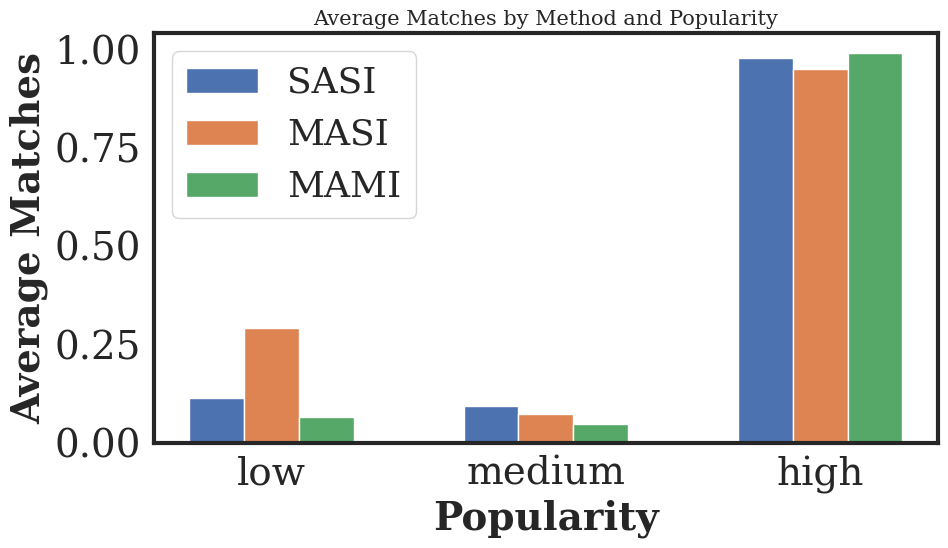

In [154]:
pivot_df = grouped_df.pivot(index='popularity', columns='method', values='avg_matches')
pivot_df = pivot_df.reindex(['low', 'medium', 'high'])  # ensure correct order

# Plot
x = np.arange(len(pivot_df.index))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, pivot_df['SASI'], width, label='SASI')
ax.bar(x, pivot_df['MASI'], width, label='MASI')
ax.bar(x + width, pivot_df['MAMI'], width, label='MAMI')

# Labels and formatting
ax.set_xlabel('Popularity')
ax.set_ylabel('Average Matches')
ax.set_title('Average Matches by Method and Popularity')
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend()

plt.tight_layout()
plt.show()

## Diversity

Using Entropy@K, with the formula: 
$$
\text{Entropy@K} = - \sum_{i \in \mathcal{I}_K} p_i \log(p_i)
$$

Normalized Entropy formula: 

$$
\text{Normalized Entropy@K} = \frac{- \sum_{i \in \mathcal{I}_K} p_i \log(p_i)}{\log(|\mathcal{I}_K|)}
$$


In [155]:
from collections import Counter
import math

def compute_normalized_entropy(recommendations):
    # Example: recommendations is a list of 45 lists, each of length 10
    # recommendations = [[item1, item2, ..., item10], ..., [item1, ..., item10]]
    flattened = [item for sublist in recommendations for item in sublist]
    freqs = Counter(flattened)
    total = len(flattened)  # should be 450

    print(total == 450)
    print(f"Unique items: {len(freqs.keys())}")

    # Step 2: Calculate probabilities
    probs = [count / total for count in freqs.values()]
    print(probs)

    # Step 3: Compute entropy
    entropy = round(-sum(p * math.log(p) for p in probs), 3)
    normalized_entropy = round(entropy / math.log(len(freqs)), 3)  

    return {
        'entropy': entropy, 
        'normalized_entropy': normalized_entropy
    }



In [156]:
print(compute_normalized_entropy(gemini_results_df['response_mami']))

True
Unique items: 49
{'entropy': 3.366, 'normalized_entropy': 0.865}


In [157]:
print(compute_normalized_entropy(gemini_results_df['response_masi']))

True
Unique items: 55
{'entropy': 3.45, 'normalized_entropy': 0.861}


In [158]:
print(compute_normalized_entropy(gemini_results_df['response_Claude3Point7Sonnet']))

True
Unique items: 87
{'entropy': 3.985, 'normalized_entropy': 0.892}


### Using Gini Index

$$
\text{Gini} = \frac{\sum_{i=1}^{n} (2i - n - 1) \cdot x_i}{n \sum_{i=1}^{n} x_i}
$$


In [159]:
def gini_index(recommendations):

    # Flatten the list of recommendations
    flattened = [item for sublist in recommendations for item in sublist]

    # Count frequency of each item
    freqs = Counter(flattened)

    # Convert counts to numpy array and sort
    values = np.array(sorted(freqs.values()))
    n = len(values)
    
    # Gini index calculation
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * values)) / (n * np.sum(values))
    
    return gini

In [160]:
gini_index(gemini_results_df['response_Claude3Point7Sonnet'])

np.float64(0.5312388250319284)

In [161]:
gini_index(gemini_results_df['response_masi'])

np.float64(0.5697777777777778)

In [162]:
gini_index(gemini_results_df['response_mami'])

np.float64(0.5560090702947846)

In [123]:
len(listings_df[listings_df['walkability'] == 'Great']['city'].unique())

100

## Sustainability

In [96]:
CITIES = [city for city in listings_df['city'].unique()]

In [95]:
sust = gemini_results_df[gemini_results_df['config_id'].str.contains("sust")]

In [ ]:
def plot_diversity(df, method):
    city_counts = {city: 0 for city in CITIES}

    df